# We are the Champions, No time for a looser

###  A deep dive into the storied legacy of the Womens Solheim Cup 

#### by Jacob Karty



The Solheim Cup is akini to the mens Ryder cup, it is a biiennial professional womens golf tournament that take place between players of European nationality and American nationality. Founded in 1990, the US womens team has been dominant over the 17 meetiings winning ten. Over the course of the last 30 years numerous competitors have been apart of the winning tradition.

This interactive article will take a look at the women who where involded in those wins, and how those wins were achived. In this data set, we will look at the data from 1990 until 2017, lookiing at the data to see if we can make an educated guess at how 2019 will turn out. At the end we will see how we did!



### Who is on the team

First lets take a look at who is on the 2019 teams and, if they have competed in the past, see how they have done. 


In [11]:
import pandas as pd
import numpy as np
import arrow
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image

data = pd.read_excel("SolhiemCup.xlsx")
xlsx = pd.ExcelFile('SolhiemCup.xlsx')


In [2]:
Teams_19  = pd.read_excel(xlsx, sheet_name="2019 Teams")


## How each team stacks up 

In [3]:
@interact
def show_articles_more_than(column=['Age', 'Previous appearances'], 
                            x=(0, 58, 1)):
    return Teams_19.loc[Teams_19[column] > x]

interactive(children=(Dropdown(description='column', options=('Age', 'Previous appearances'), value='Age'), In…

Taking a look at the teams competing, the European team has far more expearience than the Americans. With 3 rookiies opposed to an American 5. Inspecting the data by Age and number of appearances, the European team has got an advantage in enxperance and age. But age and experience do not mean everything...

## What does a win even mean?

Since the Solheim Cup consists of three differnt formats all earning the team the same ammount of points, there could be an advantage in each format? Lets take a look at Wins per format verse eachother for those with experience.

In [4]:
Teams_eu_19_exp = pd.read_excel(xlsx, sheet_name="Europe Player History")
Teams_us_19_exp = pd.read_excel(xlsx, sheet_name="US Player History")
experience_19eu = Teams_eu_19_exp[Teams_eu_19_exp.Player.isin(Teams_19.Player)]
winlosseu = experience_19eu.drop(columns= ['Country','First Year', 'Cups', 'Matches', 'Points', 'Winning %'])
experience_19US = Teams_us_19_exp[Teams_us_19_exp.Player.isin(Teams_19.Player)]
winlossus = experience_19US.drop(columns= ['First Year', 'Cups', 'Matches', 'Points', 'Winning %']) 
experience_19US

,Player,First Year,Last Year,Cups,Matches,Points,Winning %,Overall Wins,Overall Loss,Overall Halve,Singles Wins,Singles Loss,Singles Halves,Foursome Wins,Foursome Loss,Foursome Halves,Fourball Wins,Fourball Loss,Fourball Halves
20,Danielle Kang,2017,2017,1,4,3.0,0.7500,3,1,0,1,0,0,1,1,0,1,0,0
25,Jessica Korda,2013,2013,1,4,1.5,0.3750,1,2,1,0,0,1,1,1,0,0,1,0
29,Stacy Lewis,2011,2017,4,16,5.5,0.3438,5,10,1,0,3,1,2,6,0,3,1,0
39,Morgan Pressel,2007,2015,5,19,11.0,0.5789,10,7,2,4,1,0,4,3,0,2,3,2
43,Lizette Salas,2013,2017,3,10,5.0,0.5000,4,4,2,2,0,1,1,2,1,1,2,0
49,Lexi Thompson,2013,2017,3,11,7.0,0.6364,5,2,4,1,0,2,2,0,1,2,2,1
52,Angel Yin,2017,2017,1,3,1.5,0.5000,1,1,1,0,0,1,0,0,0,1,1,0


Lets compare the formats wins and losses! 
After finding a unique viz too Pygal, we will use that to show the differences in wins and losses!

In [5]:
import pygal
from IPython.display import display, HTML


base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

In [6]:
dot_chart = pygal.Dot(x_label_rotation=30)
dot_chart.title = 'US vs Europe Wins per Match'
dot_chart.x_labels = ['Singles Wins', 'Singles Loss', 'Single Halves',
                      'Foursome Wins', 'Foursome Loss', 'Foursome Halves', 'Fourball Win', 'Fourball Loss', 'Fourball Halves' ]


dot_chart.add('USA', [ 11, 8, 4, 6, 11, 13, 2, 10, 10])
dot_chart.add('Europe', [ 15, 10, 14, 7, 23, 17, 5, 26, 17])

display(HTML(base_html.format(rendered_chart=dot_chart.render(is_unicode=True))))

## So who will win next? 

We have seen who composes each team and what their pedigree brings to the table.  Finally we will look at the all import poaints aspect to each player, and really see what matters most. 

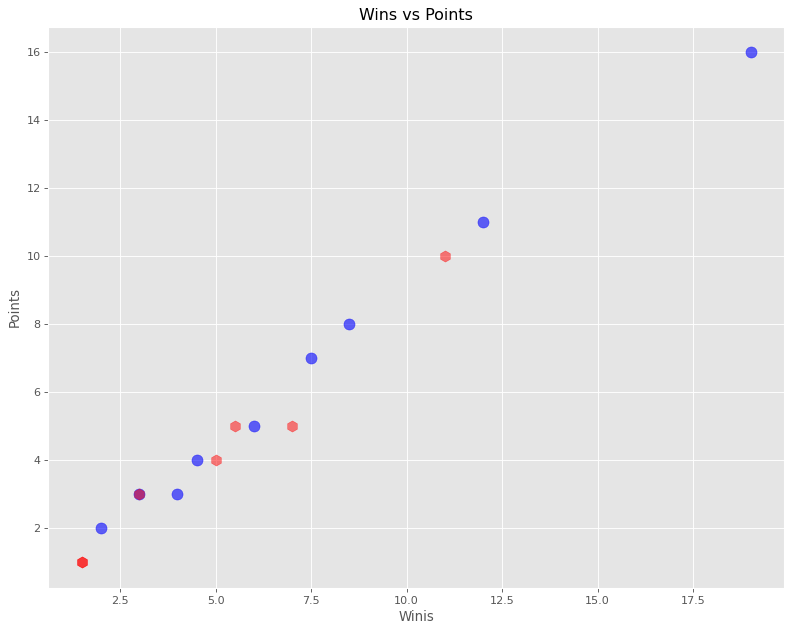

In [7]:
Coloreu = ("blue")
Colorus = ("red")
figure(figsize=(10, 8), dpi=80)
plt.style.use('ggplot')

plt.title('Wins vs Points')
plt.xlabel('Winis')
plt.ylabel('Points')
plt.scatter(x=experience_19eu['Points'],y=experience_19eu['Overall Wins'],s=100,c=Coloreu,alpha=0.6,marker='o')
plt.scatter(x=experience_19US['Points'],y=experience_19US['Overall Wins'],s=100,c=Colorus,alpha=0.5,marker='h')




plt.tight_layout()

plt.show()


## Conclusion

Both Europe and the USA are evenly matched when looking at the data. Factors rookies will bring into play will be the true tell on who has the upper hand in the 2019 Solheim Cup. If we breifly look at what the men have done in the Ryder cup as well, we can see how many wins each team has had over the years for comparison.


If you too would like to review this data and do something with it yourself, the dataset can be found at this URL
(https://data.world/sportsvizsunday/sep-2019-golf-solhiem-cup) , but an account must be
created in order to use the data. 

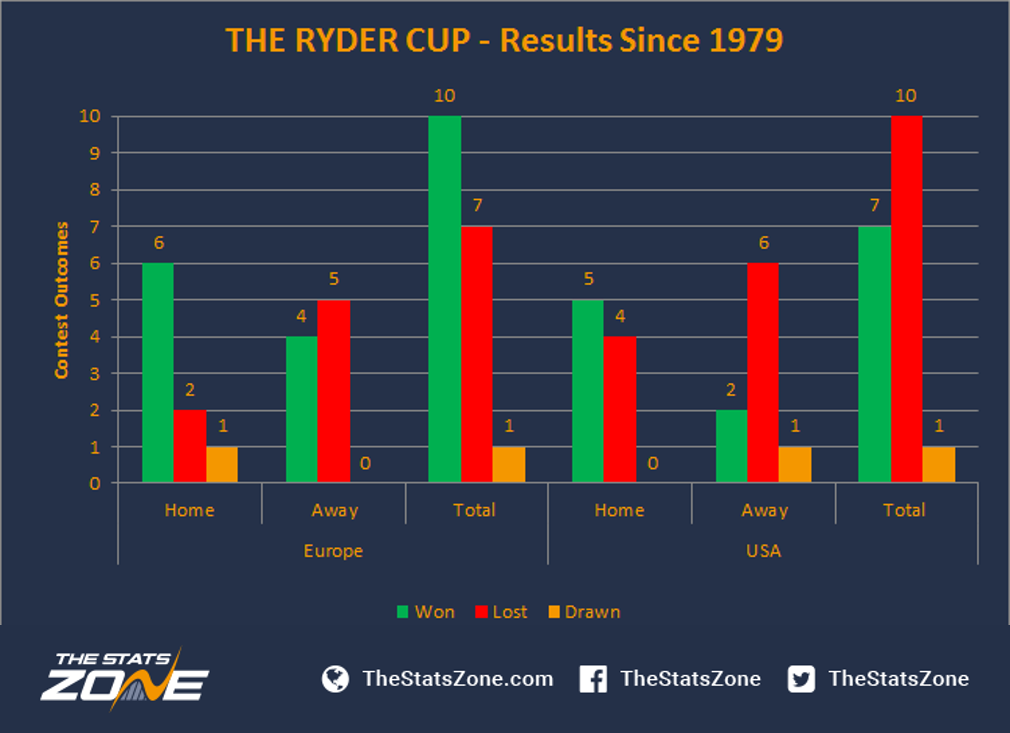

In [12]:
contextual_viz1 = Image(filename='rydercup.png')
contextual_viz1 

#### Works Cited

Code help was found through Stack overflow and a multiude of inspirations. 

Help with using pygal was found here ( https://feststelltaste.github.io/software-analytics/notebooks/vis/experimental/pandas-pygal/effective_charting.html) in order to help me render the HTML ini Jupyter notebooks. 

And help with the Sortinig slider was aquired here ( https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6)

Mens Ryder cup photo:(https://www.thestatszone.com/archive/usa-vs-europe-history-of-ryder-cup-13734)

In [8]:
conda env export > environment_droplet.yml



Note: you may need to restart the kernel to use updated packages.


In [9]:
conda env create -f environment.yml


EnvironmentFileNotFound: '/Users/jakekarty/IS-445/environment.yml' file not found


Note: you may need to restart the kernel to use updated packages.
